<a href="https://colab.research.google.com/github/phwangktw/ORI390R_queuing_2022_spring/blob/main/main_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ciw

In [2]:
!pip install matplotlib==3.5.1

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Sat Apr 30 17:08:57 2022

@author: phwangk

exogenous rate = 6 lots/hr
class: single class
station J: J=13
Service rate: Hyper exponential [0.9, 0.1], 10% of fast-passed engineering lots

Other characteristics:
    rework situations: x
    inspection stations: x
    BEOL engineering testing lot: x

"""

import ciw
import network_init_13 as init
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import stat_vis as vis
sns.set_style("whitegrid")



# Step1. Network Initialization

## distribution list (arrival) initialization
arrival_distributions_input = init.arrival_queue_init()
service_distributions_input = init.service_distributions_init()
routing_input = init.routing_init()
number_of_servers = [3, 6, 11, 9, 6, 3, 7, 8, 8, 3, 6, 8, 9]
class_change_matrices_input = init.class_change_matrices_init()

N = ciw.create_network(arrival_distributions=arrival_distributions_input,
                       service_distributions=service_distributions_input,
                       routing=routing_input,
                       class_change_matrices=class_change_matrices_input,
                       number_of_servers = number_of_servers
   )

# Step2. Simulation (10 times)
node_result_list = []
recs_list = []
simu_num = 10
max_time = 720
for trial in range(simu_num):
    ciw.seed(trial)
    Q = ciw.Simulation(N)
    Q.simulate_until_max_time(max_time)
    recs_list.append(Q.get_all_records())
    node_result_list.append(Q.transitive_nodes)

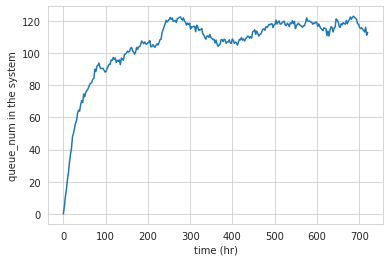

In [4]:
## 3-4 Queue length
vis.overall_queue_plot(recs_list, simu_num, max_time)

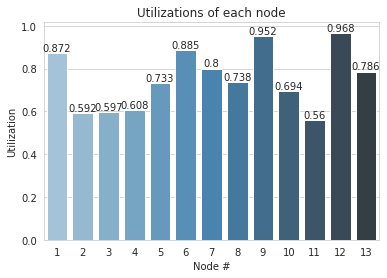

In [5]:
## 3-1 Utilization
vis.plot_util(Q.transitive_nodes)

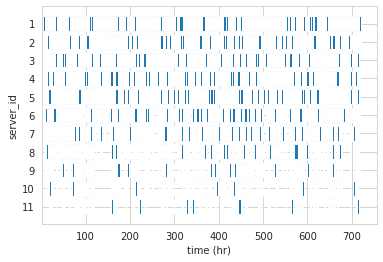

In [7]:
## 3-2 Single station Gantt plot
nodeStation = 3
vis.gantt_generate(recs_list, nodeStation)

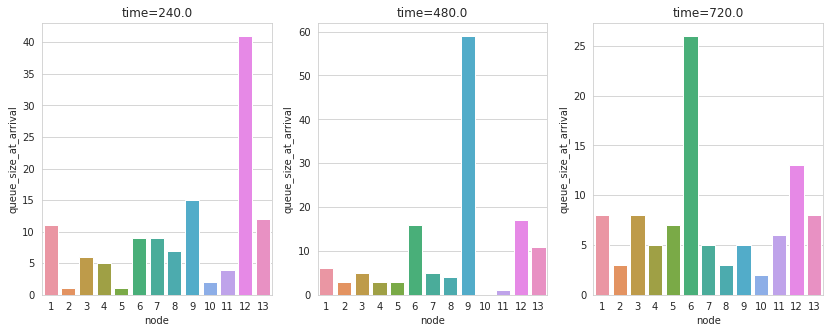

In [8]:
## 3-3 Queue length
vis.queue_plot(recs_list)